## sports_car_price_prediction

In [563]:
# import the libraries to import the dataset
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



In [564]:
# importing the data
data = pd.read_csv ("Sport car price.csv")


In [565]:
data.shape

(1007, 8)

In [566]:
data.columns

Index(['Car Make', 'Car Model', 'Year', 'Engine Size (L)', 'Horsepower',
       'Torque (lb-ft)', '0-60 MPH Time (seconds)', 'Price (in USD)'],
      dtype='object')

In [567]:
data.dtypes

Car Make                   object
Car Model                  object
Year                        int64
Engine Size (L)            object
Horsepower                 object
Torque (lb-ft)             object
0-60 MPH Time (seconds)    object
Price (in USD)             object
dtype: object

In [568]:
data.describe

<bound method NDFrame.describe of          Car Make Car Model  Year Engine Size (L) Horsepower Torque (lb-ft)  \
0         Porsche       911  2022               3        379            331   
1     Lamborghini   Huracan  2021             5.2        630            443   
2         Ferrari   488 GTB  2022             3.9        661            561   
3            Audi        R8  2022             5.2        562            406   
4         McLaren      720S  2021               4        710            568   
...           ...       ...   ...             ...        ...            ...   
1002   Koenigsegg     Jesko  2022               5       1280           1106   
1003        Lotus     Evija  2021  Electric Motor       1972           1254   
1004      McLaren     Senna  2021               4        789            590   
1005       Pagani    Huayra  2021               6        764            738   
1006        Rimac    Nevera  2021  Electric Motor       1888           1696   

     0-60 MPH Tim

In [569]:
data.info

<bound method DataFrame.info of          Car Make Car Model  Year Engine Size (L) Horsepower Torque (lb-ft)  \
0         Porsche       911  2022               3        379            331   
1     Lamborghini   Huracan  2021             5.2        630            443   
2         Ferrari   488 GTB  2022             3.9        661            561   
3            Audi        R8  2022             5.2        562            406   
4         McLaren      720S  2021               4        710            568   
...           ...       ...   ...             ...        ...            ...   
1002   Koenigsegg     Jesko  2022               5       1280           1106   
1003        Lotus     Evija  2021  Electric Motor       1972           1254   
1004      McLaren     Senna  2021               4        789            590   
1005       Pagani    Huayra  2021               6        764            738   
1006        Rimac    Nevera  2021  Electric Motor       1888           1696   

     0-60 MPH Time 

In [570]:
data.head()

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,"101,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,390"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"333,750"
3,Audi,R8,2022,5.2,562,406,3.2,"142,700"
4,McLaren,720S,2021,4,710,568,2.7,"298,000"


In [571]:
# cleaning the data
# check for null values, duplicates and other noise in the data set

data.isnull().sum()

Car Make                    0
Car Model                   0
Year                        0
Engine Size (L)            10
Horsepower                  0
Torque (lb-ft)              3
0-60 MPH Time (seconds)     0
Price (in USD)              0
dtype: int64

In [572]:
# renaming the columns
column_name = ['car make','car model','year','Engine size','horsepower','Torque','MPH_Time','Price']
data.columns= column_name


In [573]:
data.duplicated().sum()

288

In [574]:
data.drop_duplicates(inplace=True)


In [575]:
data.isnull().sum()

car make        0
car model       0
year            0
Engine size    10
horsepower      0
Torque          3
MPH_Time        0
Price           0
dtype: int64

In [576]:
data.dropna(inplace=True)

In [577]:
data

,car make,car model,year,Engine size,horsepower,Torque,MPH_Time,Price
0,Porsche,911,2022,3,379,331,4,"101,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,390"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"333,750"
3,Audi,R8,2022,5.2,562,406,3.2,"142,700"
4,McLaren,720S,2021,4,710,568,2.7,"298,000"
...,...,...,...,...,...,...,...,...
999,Nissan,370Z,2021,3.7,332,270,5.1,"30,090"
1002,Koenigsegg,Jesko,2022,5,1280,1106,2.5,"3,000,000"
1003,Lotus,Evija,2021,Electric Motor,1972,1254,2,"2,000,000"
1005,Pagani,Huayra,2021,6,764,738,3,"2,600,000"


In [578]:
for i in data.index:
    if data.loc[i,'Engine size'] == 'Electric Motor':
        data.drop(i,inplace= True)
        


In [579]:
data

,car make,car model,year,Engine size,horsepower,Torque,MPH_Time,Price
0,Porsche,911,2022,3,379,331,4,"101,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,390"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"333,750"
3,Audi,R8,2022,5.2,562,406,3.2,"142,700"
4,McLaren,720S,2021,4,710,568,2.7,"298,000"
...,...,...,...,...,...,...,...,...
996,Mercedes-Benz,SLS AMG,2021,6.3,622,468,3.6,"254,500"
998,Ford,Mustang,2021,2.3,310,350,5.3,"27,205"
999,Nissan,370Z,2021,3.7,332,270,5.1,"30,090"
1002,Koenigsegg,Jesko,2022,5,1280,1106,2.5,"3,000,000"


In [580]:
# changing the ',' in the price to ''
data['Price']= data['Price'].str.replace(",","").astype(int)

In [581]:
# creating a column to check the age of the cars
from datetime import datetime
current_year = datetime.now().year
data['Age'] = current_year -data['year']

In [582]:
data

,car make,car model,year,Engine size,horsepower,Torque,MPH_Time,Price,Age
0,Porsche,911,2022,3,379,331,4,101200,2
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,274390,3
2,Ferrari,488 GTB,2022,3.9,661,561,3,333750,2
3,Audi,R8,2022,5.2,562,406,3.2,142700,2
4,McLaren,720S,2021,4,710,568,2.7,298000,3
...,...,...,...,...,...,...,...,...,...
996,Mercedes-Benz,SLS AMG,2021,6.3,622,468,3.6,254500,3
998,Ford,Mustang,2021,2.3,310,350,5.3,27205,3
999,Nissan,370Z,2021,3.7,332,270,5.1,30090,3
1002,Koenigsegg,Jesko,2022,5,1280,1106,2.5,3000000,2


In [583]:
# we can now drop the year column because we have the age of the cars
data.drop(['year'],axis=1,inplace=True)

In [584]:
# reindexing the columns
col_index = ['car make','car model','Engine size','horsepower','Torque','MPH_Time','Age','Price']
data= data.reindex(columns=col_index)


In [585]:
# changing data types 
data['Engine size']= pd.to_numeric(data['Engine size'],errors='coerce')
data['horsepower']= pd.to_numeric(data['horsepower'],errors='coerce')
data['Torque'] = pd.to_numeric(data['Torque'],errors='coerce')
data['MPH_Time']=pd.to_numeric(data['MPH_Time'],errors='coerce')



In [586]:
# checking if some of the values has been coerced to nan
data.isnull().sum()

car make        0
car model       0
Engine size    39
horsepower      7
Torque          5
MPH_Time        1
Age             0
Price           0
dtype: int64

In [587]:
# removing the nan values
data.dropna(inplace=True)


In [588]:
# checking the data after removing the nan
data.shape

(663, 8)

In [589]:

data.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine size,663.0,4.429713,1.429810,1.5,3.5,4.0,6.0,8.4
horsepower,663.0,578.036199,220.971951,181.0,444.0,573.0,650.0,1600.0
Torque,663.0,507.907994,179.736083,151.0,384.0,479.0,590.0,1300.0
MPH_Time,663.0,3.656259,0.729080,2.1,3.1,3.5,4.0,6.5
Age,663.0,2.874811,2.417400,1.0,2.0,3.0,3.0,59.0
Price,663.0,336107.431373,713030.994403,25000.0,69000.0,114000.0,222252.0,5200000.0


## visualizing the data

<Axes: ylabel='Engine size'>

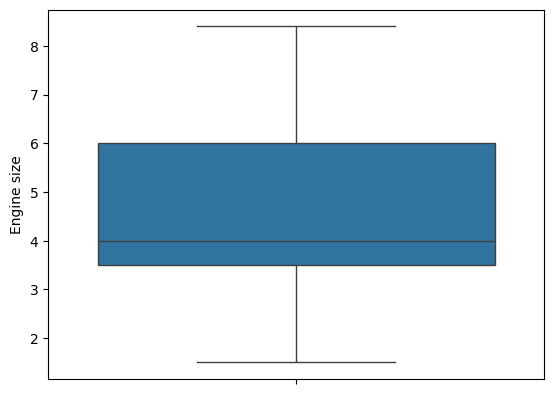

In [590]:
sns.boxplot(data['Engine size'])

<Axes: ylabel='horsepower'>

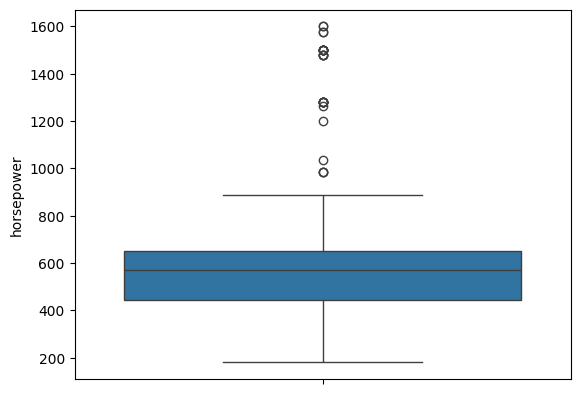

In [591]:
sns.boxplot(data['horsepower'])

<Axes: ylabel='Torque'>

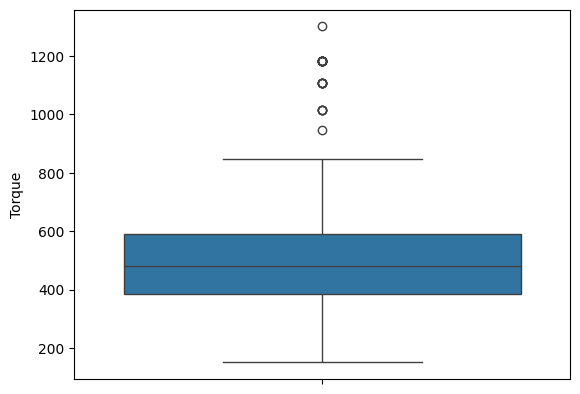

In [592]:
sns.boxplot(data['Torque'])

<Axes: ylabel='MPH_Time'>

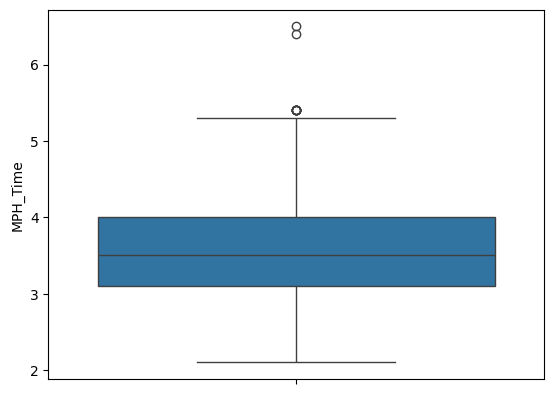

In [593]:
sns.boxplot(data['MPH_Time'])

## checking and removing outliers

In [594]:
# Define numeric columns to analyze for outliers
numeric_columns = ['Engine size', 'horsepower', 'Torque', 'MPH_Time', 'Price', 'Age']

# Function to remove outliers using the IQR method
def remove_outliers(data, columns):
    for column in columns:
        Q1 = data[column].quantile(0.25)  # 25th percentile
        Q3 = data[column].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1  # Interquartile range

        # Define bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove rows outside the bounds
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

# Remove outliers from the dataset
cleaned_data = remove_outliers(data, numeric_columns)

print("Cleaned DataFrame:")
print(cleaned_data)


Cleaned DataFrame:
          car make car model  Engine size  horsepower  Torque  MPH_Time  Age  \
0          Porsche       911          3.0       379.0   331.0       4.0    2   
1      Lamborghini   Huracan          5.2       630.0   443.0       2.8    3   
2          Ferrari   488 GTB          3.9       661.0   561.0       3.0    2   
3             Audi        R8          5.2       562.0   406.0       3.2    2   
4          McLaren      720S          4.0       710.0   568.0       2.7    3   
..             ...       ...          ...         ...     ...       ...  ...   
994        McLaren        GT          4.0       612.0   465.0       3.1    2   
995            BMW        M2          3.0       405.0   406.0       4.0    3   
996  Mercedes-Benz   SLS AMG          6.3       622.0   468.0       3.6    3   
998           Ford   Mustang          2.3       310.0   350.0       5.3    3   
999         Nissan      370Z          3.7       332.0   270.0       5.1    3   

      Price  
0    1

In [595]:
cleaned_data

,car make,car model,Engine size,horsepower,Torque,MPH_Time,Age,Price
0,Porsche,911,3.0,379.0,331.0,4.0,2,101200
1,Lamborghini,Huracan,5.2,630.0,443.0,2.8,3,274390
2,Ferrari,488 GTB,3.9,661.0,561.0,3.0,2,333750
3,Audi,R8,5.2,562.0,406.0,3.2,2,142700
4,McLaren,720S,4.0,710.0,568.0,2.7,3,298000
...,...,...,...,...,...,...,...,...
994,McLaren,GT,4.0,612.0,465.0,3.1,2,210000
995,BMW,M2,3.0,405.0,406.0,4.0,3,58900
996,Mercedes-Benz,SLS AMG,6.3,622.0,468.0,3.6,3,254500
998,Ford,Mustang,2.3,310.0,350.0,5.3,3,27205


##visualizing to see if outliers are removed on numeric data

<Axes: ylabel='Engine size'>

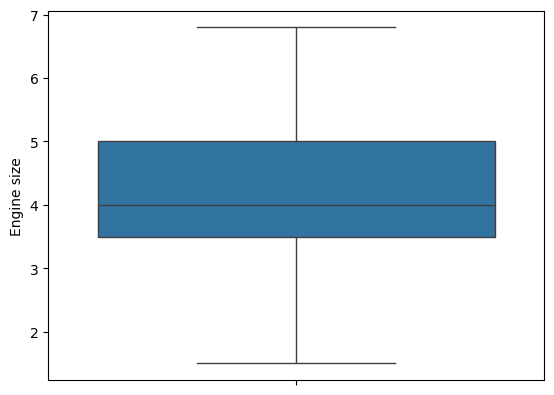

In [596]:
sns.boxplot(cleaned_data['Engine size'])

<Axes: ylabel='MPH_Time'>

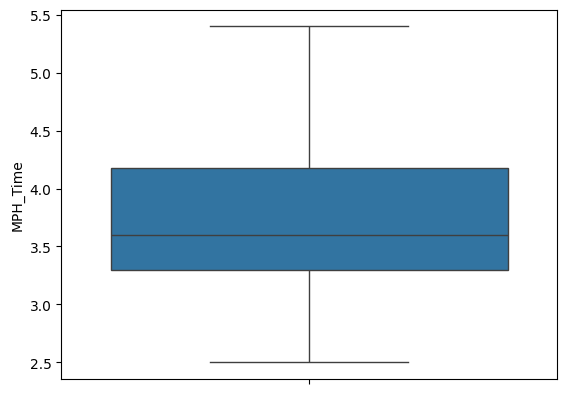

In [597]:
sns.boxplot(cleaned_data['MPH_Time'])

<Axes: ylabel='Age'>

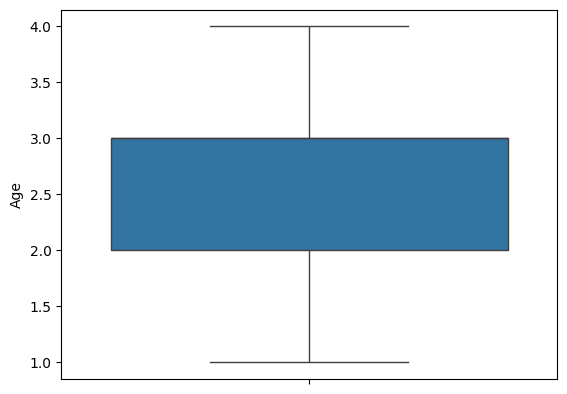

In [598]:
sns.boxplot(cleaned_data['Age'])

<Axes: ylabel='Price'>

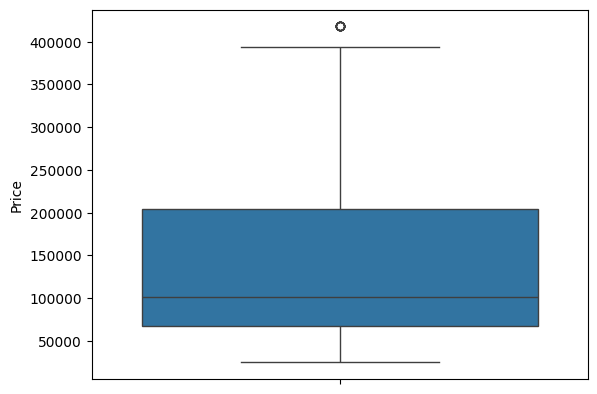

In [599]:
sns.boxplot(cleaned_data['Price'])

## machine learning


In [600]:
# import libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import OrdinalEncoder 


## applying encoding on categorical data 

In [601]:
#applying Ordinal encoder on the categorical features car make and car model
oe = OrdinalEncoder()
cleaned_data[['car_make','car_model']]= oe.fit_transform(cleaned_data[['car make','car model']])

 

In [602]:
cleaned_data

,car make,car model,Engine size,horsepower,Torque,MPH_Time,Age,Price,car_make,car_model
0,Porsche,911,3.0,379.0,331.0,4.0,2,101200,23.0,18.0
1,Lamborghini,Huracan,5.2,630.0,443.0,2.8,3,274390,14.0,83.0
2,Ferrari,488 GTB,3.9,661.0,561.0,3.0,2,333750,10.0,5.0
3,Audi,R8,5.2,562.0,406.0,3.2,2,142700,5.0,108.0
4,McLaren,720S,4.0,710.0,568.0,2.7,3,298000,18.0,15.0
...,...,...,...,...,...,...,...,...,...,...
994,McLaren,GT,4.0,612.0,465.0,3.1,2,210000,18.0,74.0
995,BMW,M2,3.0,405.0,406.0,4.0,3,58900,6.0,86.0
996,Mercedes-Benz,SLS AMG,6.3,622.0,468.0,3.6,3,254500,20.0,130.0
998,Ford,Mustang,2.3,310.0,350.0,5.3,3,27205,11.0,96.0


In [603]:
# drop the categorical data in cleaned data 
cleaned_data.drop(['car make','car model'], axis=1, inplace=True)

In [604]:
cleaned_data

,Engine size,horsepower,Torque,MPH_Time,Age,Price,car_make,car_model
0,3.0,379.0,331.0,4.0,2,101200,23.0,18.0
1,5.2,630.0,443.0,2.8,3,274390,14.0,83.0
2,3.9,661.0,561.0,3.0,2,333750,10.0,5.0
3,5.2,562.0,406.0,3.2,2,142700,5.0,108.0
4,4.0,710.0,568.0,2.7,3,298000,18.0,15.0
...,...,...,...,...,...,...,...,...
994,4.0,612.0,465.0,3.1,2,210000,18.0,74.0
995,3.0,405.0,406.0,4.0,3,58900,6.0,86.0
996,6.3,622.0,468.0,3.6,3,254500,20.0,130.0
998,2.3,310.0,350.0,5.3,3,27205,11.0,96.0


In [605]:
# reindexing the columns
col_index = ['car_make','car_model','Engine size','horsepower','Torque','MPH_Time','Age','Price']
cleaned_data= cleaned_data.reindex(columns=col_index)

In [606]:
cleaned_data

,car_make,car_model,Engine size,horsepower,Torque,MPH_Time,Age,Price
0,23.0,18.0,3.0,379.0,331.0,4.0,2,101200
1,14.0,83.0,5.2,630.0,443.0,2.8,3,274390
2,10.0,5.0,3.9,661.0,561.0,3.0,2,333750
3,5.0,108.0,5.2,562.0,406.0,3.2,2,142700
4,18.0,15.0,4.0,710.0,568.0,2.7,3,298000
...,...,...,...,...,...,...,...,...
994,18.0,74.0,4.0,612.0,465.0,3.1,2,210000
995,6.0,86.0,3.0,405.0,406.0,4.0,3,58900
996,20.0,130.0,6.3,622.0,468.0,3.6,3,254500
998,11.0,96.0,2.3,310.0,350.0,5.3,3,27205


## splitting the data

In [607]:
# splitting the data into independent(response) and dependent (explainatory/target) set
X = cleaned_data.iloc[:,:-1]
y = cleaned_data.iloc[:,-1]
X

,car_make,car_model,Engine size,horsepower,Torque,MPH_Time,Age
0,23.0,18.0,3.0,379.0,331.0,4.0,2
1,14.0,83.0,5.2,630.0,443.0,2.8,3
2,10.0,5.0,3.9,661.0,561.0,3.0,2
3,5.0,108.0,5.2,562.0,406.0,3.2,2
4,18.0,15.0,4.0,710.0,568.0,2.7,3
...,...,...,...,...,...,...,...
994,18.0,74.0,4.0,612.0,465.0,3.1,2
995,6.0,86.0,3.0,405.0,406.0,4.0,3
996,20.0,130.0,6.3,622.0,468.0,3.6,3
998,11.0,96.0,2.3,310.0,350.0,5.3,3


In [608]:
y

0      101200
1      274390
2      333750
3      142700
4      298000
        ...  
994    210000
995     58900
996    254500
998     27205
999     30090
Name: Price, Length: 574, dtype: int32

## Training the data:

In [609]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=10)

print('X_train:',X_train.shape, 'y_train', y_train.shape)

X_train: (430, 7) y_train (430,)


## Decision Tree model

In [610]:

# Initialize the Decision Tree Regressor with the correct criterion
reg = DecisionTreeRegressor(criterion="squared_error", max_depth=3, random_state=42)




In [611]:
reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [612]:
y_pred = reg.predict(X_test)
y_pred

array([103683.88235294, 103683.88235294, 204048.17123288,  65067.75362319,
       204048.17123288, 103683.88235294, 204048.17123288,  62287.57575758,
       103683.88235294,  62287.57575758,  41626.6       , 204048.17123288,
       204048.17123288, 103683.88235294,  65067.75362319, 103683.88235294,
       204048.17123288, 204048.17123288, 103683.88235294,  62287.57575758,
       400952.33333333,  99851.14285714,  99851.14285714, 204048.17123288,
        99851.14285714,  65067.75362319, 400952.33333333, 204048.17123288,
       204048.17123288, 103683.88235294, 103683.88235294,  65067.75362319,
        65067.75362319, 103683.88235294,  65067.75362319,  41626.6       ,
       204048.17123288, 103683.88235294,  99851.14285714,  99851.14285714,
        41626.6       , 204048.17123288, 204048.17123288, 204048.17123288,
        65067.75362319, 103683.88235294, 103683.88235294, 204048.17123288,
        65067.75362319, 103683.88235294,  62287.57575758, 204048.17123288,
       204048.17123288,  

In [613]:
mean_squared_error(y_test,y_pred)

1892922652.8858633

In [614]:
# checking validation score 
# cv=10 ,defines the number iteration
from sklearn.model_selection import cross_val_score
cross_val_score(reg,X_train,y_train,cv = 10)

array([0.69264747, 0.73213301, 0.67632893, 0.78277687, 0.79374198,
       0.71652242, 0.70132647, 0.75973071, 0.63169387, 0.56081523])

In [615]:
score1 = r2_score(y_test,y_pred)
score1

0.787619818715922

In [616]:
# checking prediction
pred2= reg.predict([[23.0,18.0,3.0,379.0,331.0,4.0,	2]])
print(pred2)

[65067.75362319]


c:\Users\LAPTOP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [617]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test =sc.fit_transform(X_test)

In [618]:
pred3= reg.predict([[23.0,18.0,3.0,379.0,331.0,4.0,	2]])

c:\Users\LAPTOP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [619]:
pred3

array([65067.75362319])

### using Random Forest Regressor

In [620]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [621]:
RF= RandomForestRegressor(random_state=15)


In [622]:
RF.fit(X_train, y_train)

RandomForestRegressor(random_state=15)

In [623]:
y_pred = RF.predict(X_test)

In [624]:
mean_absolute_error(y_test,y_pred)

9089.490288853163

In [625]:
mean_squared_error(y_test,y_pred)

484681193.3723266

In [626]:
score2 = r2_score(y_test,y_pred)

## Linear Regression

In [627]:
LR = LinearRegression()
LR.fit (X_train,y_train)


LinearRegression()

In [628]:
y_pred = LR.predict(X_test)

In [629]:
score3 = r2_score(y_test,y_pred)

In [630]:
final_data = pd.DataFrame({'Models':['Decision Tree','Random forest','linear regression'],
                        
              'r2_score':[score1,score2,score3] })

In [631]:
final_data

,Models,r2_score
0,Decision Tree,0.787620
1,Random forest,0.946591
2,linear regression,0.514687


<Axes: xlabel='Models', ylabel='r2_score'>

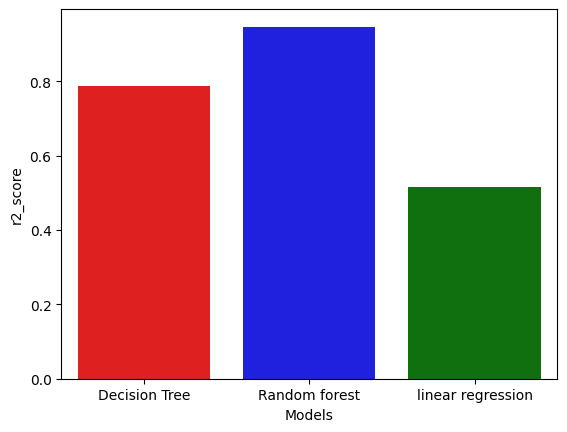

In [632]:
sns.barplot(x='Models', y='r2_score', data=final_data, palette=['red', 'blue', 'green'],hue='Models',legend=False)

## saving the best model

In [633]:
RF =RandomForestRegressor()
RF.fit(X,y)

RandomForestRegressor()

In [634]:
import joblib

In [635]:

joblib.dump(RF, 'car_price_predictor')


['car_price_predictor']

In [636]:
moodel = joblib.load('car_price_predictor')

In [637]:
#prediction on new data
new_data = pd.DataFrame({
'car_make':23.0,
'car_model': 18.0,
'Engine size':3.0,
'horsepower':379.0,
'Torque':331.0,
'MPH_Time':4.0,
'Age':2.0
},index=[0])

		

In [638]:
moodel.predict(new_data)

array([89545.51666667])

## GUI 

In [640]:
from tkinter import *
import joblib

def show_entry_fields():
    p1 = float(entry1.get())
    p2 = float(entry2.get())
    p3 = float(entry3.get())
    p4 = float(entry4.get())
    p5 = float(entry5.get())
    p6 = float(entry6.get())
    p7 = float(entry7.get())

    model= joblib.load('car_price_predictor')
    
    new_data = pd.DataFrame({
'car_make':p1,
'car_model': p2,
'Engine size':p3,
'horsepower':p4,
'Torque':p5,
'MPH_Time':p6,
'Age':p7,
},index=[0])
    
    result = model.predict(new_data)
    Label(window,text="Car Purchase Amount").grid(row=8)
    Label(window,text=result).grid(row=10)
    print('Car Purchased Amount',result[0])
window = Tk()
window.minsize(200,200)
window.title("Car Price")
Label1 = Label(window,text="Car Pricing Using Machine Learning",bg="black",fg="white")
Label1.grid(row=0,columnspan=2)
carmake = Label(window,text='car_make')
carmake.grid(row=1)

carmodel = Label(window,text='car_model')
carmodel.grid(row=2)

enginesize = Label(window,text='Engine size')
enginesize.grid(row=3)

horsepower = Label(window,text='horsepower')
age = Label(window,text='Age')
age.grid(row=7)

entry1 = Entry(window)
entry2 = Entry(window)
entry3 = Entry(window)
entry4= Entry(window)
entry5 = Entry(window)
entry6 = Entry(window)
entry7 = Entry(window)

entry1.grid(row=1,column =1)
entry2 .grid(row=2,column =1)
entry3 .grid(row=3,column =1)
entry4.grid(row=4,column =1)
entry5 .grid(row=5,column =1)
entry6 .grid(row=6,column =1)
entry7.grid(row=7,column =1)

Button(window,text="Predict",command=show_entry_fields).grid()
window.mainloop()

Car Purchased Amount 89545.51666666668
